In [7]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
RANDOM_STATE = 1026 # For same results based on each algorithm
print ("Mudule load complete!")

Mudule load complete!


### 사용할 데이터를 추출 후, standardization함


In [8]:
# 사용할 Personal Loan 데이터셋을 불러옵니다.
Rawdata = pd.read_csv('E:/Untitled Folder/Personal Loan.csv')

# Print Column names

print("'Personal Loan' data column name : ", list(Rawdata.columns.values))
print("ID와 ZIP Code는 사용하지 않습니다")
# Allocate column index based on Input and Output varaibles

Input_Column_Index = np.concatenate((range(1,4),range(5,9),range(10,14)))
Target_Column_Index = np.array([9])

# Distance를 이용한 similarity를 구할것이므로 모든 변수를 standardization 한다.
Input_Rawdata = np.array(Rawdata)[:,Input_Column_Index]
Personal_Loan_Data = np.array(Rawdata)[:,Target_Column_Index]

def standardization(Data):
 return ((Data - np.mean(Data, axis=0)) / np.std(Data, axis=0))

Input_Std = standardization(Input_Rawdata)

'Personal Loan' data column name :  ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
ID와 ZIP Code는 사용하지 않습니다


### k-Means clustering을 시행
Hyper-parameter인 k는 2~10까지 생성
평가지표는 silhouette score를 사용 

In [9]:
def k_Means_Ploan(Data,Select_k,Init_Method='k-means++',Num_Init=100):
    Result_List = list()
    Parameter_List = list()
    Silhouette_List=list()
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i,init=Init_Method,n_init=Num_Init,random_state=RANDOM_STATE)
        Kmeans_Clustering.fit(Data)
        Result_List.append(Kmeans_Clustering.labels_)
        Silhouette_List.append(np.round(silhouette_score(Data,Kmeans_Clustering.labels_),3))
        Parameter_List.append(str(i))      
    print("Complete!")
    return(Result_List, Parameter_List,Silhouette_List)

In [10]:
Cluster_Results, Parameter_K, Shilhouette_Score=k_Means_Ploan(Input_Std,range(2,11))

Complete!


### k=5일때가 Best인것을 확인


Best k is : 5
Counter({2: 918, 1: 890, 3: 341, 0: 195, 4: 156})


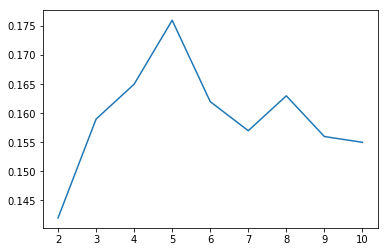

In [14]:
Best_K_based_on_Shilhouette= Parameter_K[np.where(Shilhouette_Score==np.max(Shilhouette_Score))[0][0]]
Best_Cluster_Results = Cluster_Results[np.where(Shilhouette_Score==np.max(Shilhouette_Score))[0][0]]
print("Best k is : " + Best_K_based_on_Shilhouette)
print(collections.Counter(Best_Cluster_Results))
plt.plot(Parameter_K,Shilhouette_Score)